# Hydrogen 21-cm emission in the direction of Proxima Centauri
---
The goal of this notebook is to generate spectra of the Hydrogen 21cm (1420.4 MHz) emission in the direction of Prox Cen, and then eventually compare to spectra from HIPASS survey.

In [66]:
import blimpy as bl
import pylab as plt
import astropy as ap
import numpy as np
import pandas as pd

In [67]:
%matplotlib inline

### Coordinate Conversions of Proxima Centauri
I needed the coordinates in degrees in order to search the [BL Open Data Archive](http://seti.berkeley.edu/opendata).

In [72]:
from astropy.coordinates import Angle
from astropy import units as u

#RA of Proxcen
HA = Angle("14h29m42.94512s", unit='hourangle')
print("RA in hour angle: "+str(HA))
print("RA in degrees: "+str(HA.degree))

#DEC of Proxcen
DEC = Angle("-62d40m46.1708s", "deg")
print("\nDEC in degree, min, sec: "+str(DEC))
print("DEC in degrees: "+str(DEC.degree))

RA in hour angle: 14h29m42.9451s
RA in degrees: 217.428938

DEC in degree, min, sec: -62d40m46.1708s
DEC in degrees: -62.67949188888888


### Import Parkes data

In [80]:
fb = bl.Waterfall('/mnt_blpd11/datax2/collate_mb_2/PKS_0342_2018-08-15T19:00/blc05/guppi_58346_10769_381134_G314.88-3.44_0001.0000.h5',
                  f_start=1400, f_stop=1445)

There was no data in the frequency range for the hydrogen 21cm line, so I tried it out on some random Parkes data (Appears to be close to Prox Cen).

In [81]:
fb.info()


--- File Info ---
DIMENSION_LABELS : [b'frequency' b'feed_id' b'time']
        az_start :                              0.0
       data_type :                                1
            fch1 :                      1513.75 MHz
            foff :       -3.337860107421875e-06 MHz
           ibeam :                                3
      machine_id :                               20
          nbeams :                               13
           nbits :                               32
          nchans :                         46137344
            nifs :                                1
     rawdatafile : guppi_58346_10769_381134_G314.88-3.44_0001.0000.fil
     source_name :                     G314.88-3.44
         src_dej :                     -63:24:40.32
         src_raj :                     14:39:08.112
    telescope_id :                                4
           tsamp :               15.279250285714514
   tstart (ISOT) :          2018-08-16T02:59:29.000
    tstart (MJD) :       

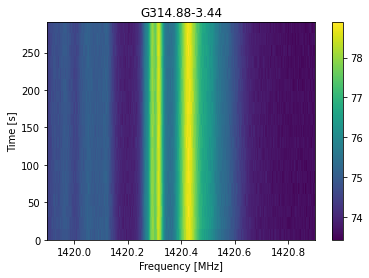

In [82]:
fb.plot_waterfall(logged=True, f_start=1419.9, f_stop=1420.9)

extracting integration 0...


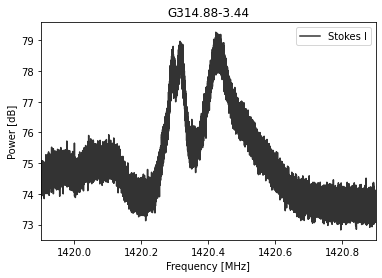

In [106]:
fb.plot_spectrum(logged=True, f_start=1419.9, f_stop=1420.9)

Gained access to more recent Parkes data of Proxima Centauri at the correct frequencies, so here is the Hydrogen 21-cm line for Proxima Centauri:

In [117]:
fb1 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-05-04T14:20:32.000.fil',
                  f_start=1416.9, f_stop=1423.9)
fb1.info()


--- File Info ---
    telescope_id :                                4
           nbits :                               32
     source_name :                        ProxCen_S
       data_type :                                1
          nchans :                         33554432
           ibeam :                                1
     barycentric :                                0
   pulsarcentric :                                0
           tsamp :                        16.777216
            foff :          -3.814697265625e-06 MHz
         src_raj :                     14:29:42.949
         src_dej :                     -61:59:53.84
   tstart (ISOT) :          2019-05-04T14:20:32.000
    tstart (MJD) :                58607.59759259259
          nbeams :                                1
            fch1 :                       1472.0 MHz
            nifs :                                1

Num ints in file :                              107
      File shape :               (107, 1, 33

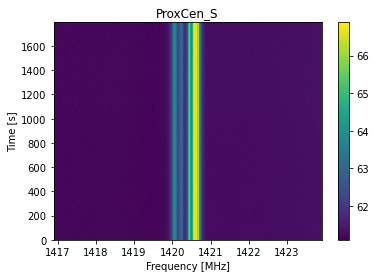

In [118]:
fb1.plot_waterfall(logged=True)

extracting integration 0...


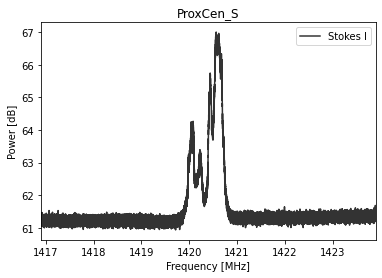

In [119]:
fb1.plot_spectrum(logged=True)

In [120]:
fb2 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_ProxCen_S_2019-04-29T13:47:46.000.fil',
                  f_start=1416.9, f_stop=1423.9)
fb2.info()


--- File Info ---
    telescope_id :                                4
           nbits :                               32
     source_name :                        ProxCen_S
       data_type :                                1
          nchans :                         33554432
           ibeam :                                1
     barycentric :                                0
   pulsarcentric :                                0
           tsamp :                        16.777216
            foff :          -3.814697265625e-06 MHz
         src_raj :                     14:29:42.949
         src_dej :                     -61:59:53.84
   tstart (ISOT) :          2019-04-29T13:47:46.000
    tstart (MJD) :               58602.574837962966
          nbeams :                                1
            fch1 :                       1472.0 MHz
            nifs :                                1

Num ints in file :                              107
      File shape :               (107, 1, 33

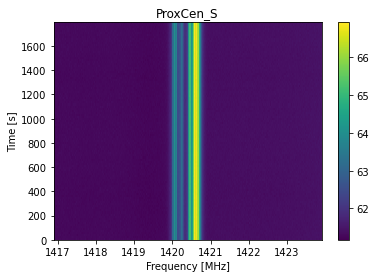

In [121]:
fb2.plot_waterfall(logged=True)

extracting integration 0...


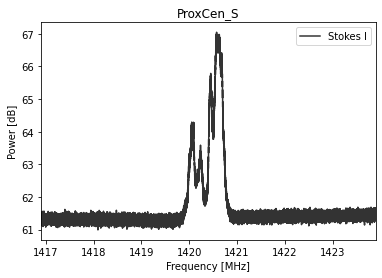

In [122]:
fb2.plot_spectrum(logged=True)

21cm emission of PSR J1644-4559 for a comparison of the difference in interstellar medium.

In [128]:
fb3 = bl.Waterfall('/mnt_blpd2/datax/PKSUWL/blc06/PKSUWL/blc06_J1644-4559_S_2019-05-01T14:14:03.000.fil',
                  f_start=1416.9, f_stop=1423.9)
fb3.info()


--- File Info ---
    telescope_id :                                4
           nbits :                               32
     source_name :                     J1644-4559_S
       data_type :                                1
          nchans :                         33554432
           ibeam :                                1
     barycentric :                                0
   pulsarcentric :                                0
           tsamp :                        16.777216
            foff :          -3.814697265625e-06 MHz
         src_raj :                     16:44:49.281
         src_dej :                      -44:41:30.5
   tstart (ISOT) :          2019-05-01T14:14:03.000
    tstart (MJD) :               58604.593090277776
          nbeams :                                1
            fch1 :                       1472.0 MHz
            nifs :                                1

Num ints in file :                               18
      File shape :                (18, 1, 33

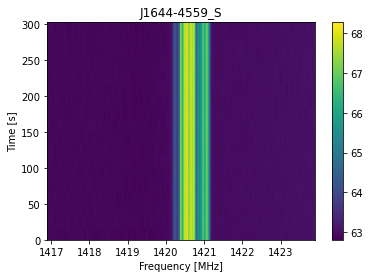

In [125]:
fb3.plot_waterfall(logged=True)

extracting integration 0...


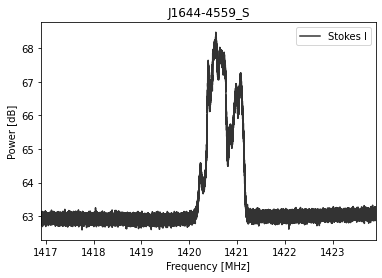

In [126]:
fb3.plot_spectrum(logged=True)

### Importing HIPASS Survery Data
Coordinates of this [data](https://www.atnf.csiro.au/cgi-bin/multi/release/download.cgi?cubename=/var/www/vhosts/www.atnf.csiro.au/htdocs/research/multibeam/release/MULTI_3_HIDE/PUBLIC/H062_abcde_luther.FELO.imbin.vrd&hann=1&coord=14%3A29%3A43.0%2C-61%3A19%3A13&xrange=1362.6%2C1426.5&xaxis=frequency&datasource=hipass&type=ascii) are: <br/>RA: 14:29:43.0 <br/>DEC: -61:19:13

In [68]:
data = pd.read_csv('HIPASS_142943.0-6119.txt', sep="      |    |   ")
#data.columns = ['Channel','Spectral axis','Intensity']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [76]:
data

,Channel,Spectral axis,Intensity,Jy
0,2.0,1426.437744,0.049867,0.001539
1,3.0,1426.375244,-0.050234,-0.001550
2,4.0,1426.312744,0.075503,0.002330
3,5.0,1426.250244,-0.021546,-0.000665
4,6.0,1426.187744,0.063143,0.001948
...,...,...,...,...
1017,1019.0,1362.875244,-0.007660,-0.000236
1018,1020.0,1362.812744,0.038423,0.001186
1019,1021.0,1362.750244,0.043611,0.001346
1020,1022.0,1362.687744,-0.025971,-0.000801


In [78]:
#Intensity is Jy/beam so here is a conversion
bmaj = 14.3 * u.arcmin
beam_area = 2*np.pi*bmaj/(4*np.log(2))
data['Jy'] = data['Intensity'] * u.Jy/beam_area
data['Db']

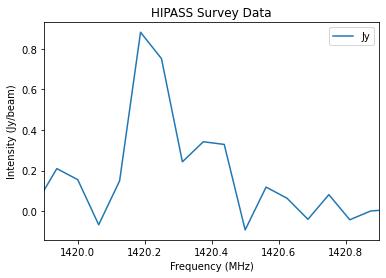

In [86]:
data.plot('Spectral axis','Jy')
plt.xlim(1419.9,1420.9)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Intensity (Jy/beam)')
plt.title('HIPASS Survey Data')
plt.show()